### Universidad del Valle de Guatemala<br>
### Inteligencia Artificial <br>
### Proyecto Final - Clsificación de Credit Score <br>

Diego Ruiz 18761, Jose Jorge Perez 18364

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, learning_curve
from sklearn import metrics
from seaborn import heatmap, countplot
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("train.csv", encoding="latin1")
data.head()

C:\Users\yeyoc\AppData\Local\Temp\ipykernel_5776\3378091086.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train.csv", encoding="latin1")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
print('Shape:' ,data.shape, '\n')
print('dtype\n', data.dtypes)

Shape: (100000, 28) 

dtype
 ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
data = data.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Month"], axis=1)
data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [7]:
# Porcentaje de datos nulos del dataset con las columnas esperadas.
null_data = data.isnull().sum()
null_data = null_data / len(data)
null_data.sum()

0.50086

<AxesSubplot: >

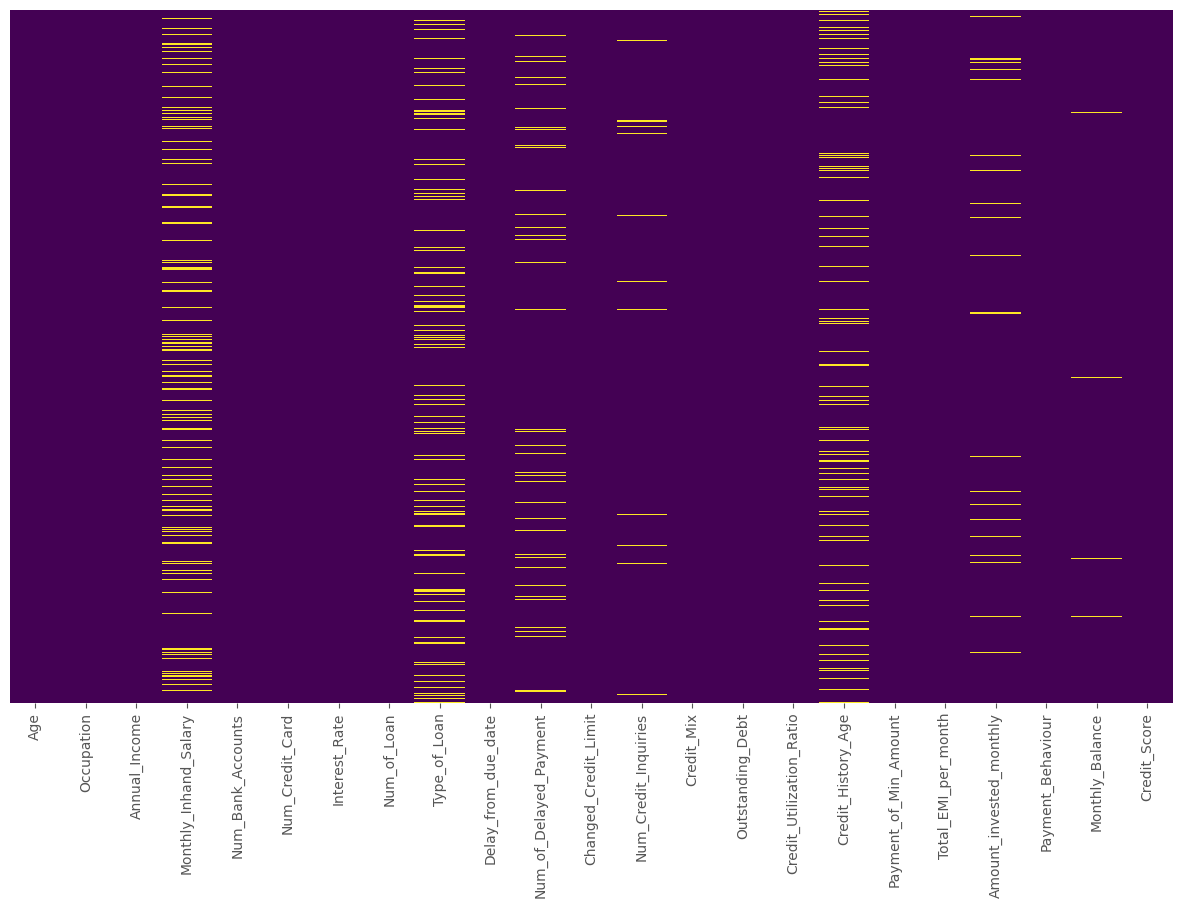

In [8]:
heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

[Text(0, 0, '17828'), Text(0, 0, '53174'), Text(0, 0, '28998')]

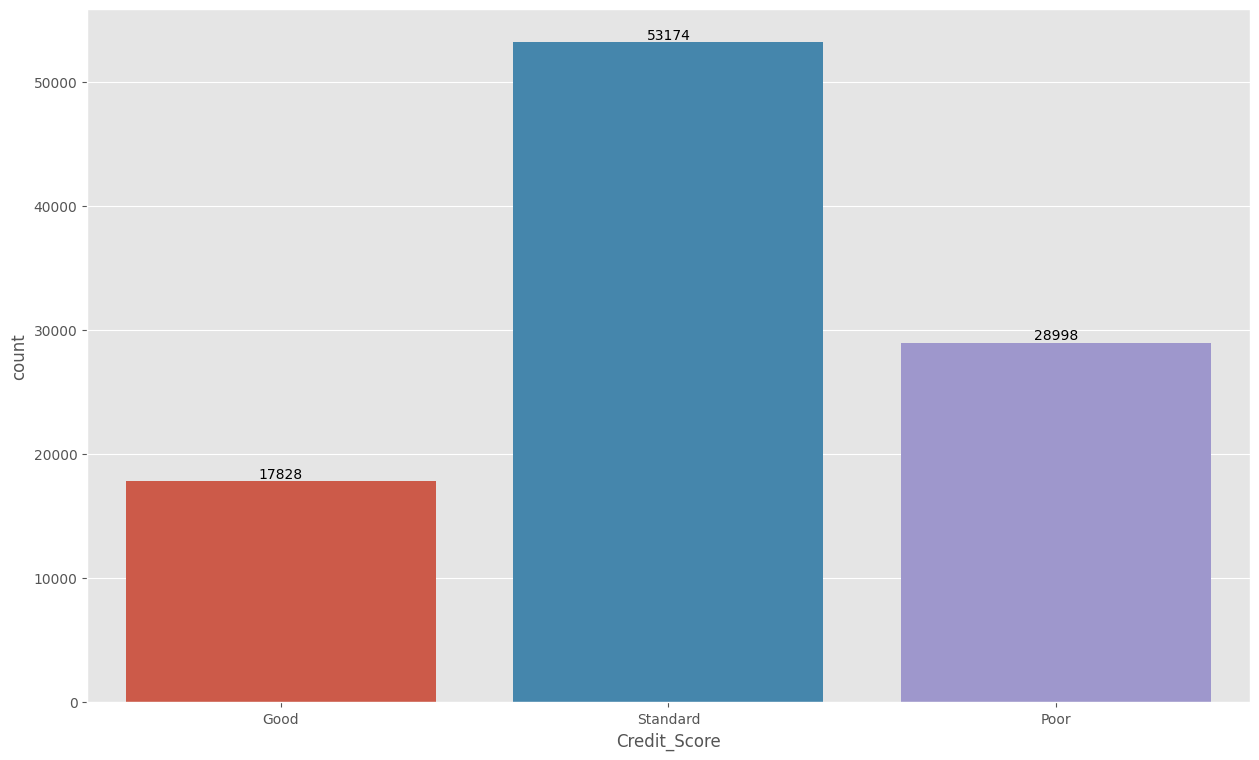

In [9]:
hist = countplot(data, x="Credit_Score")
hist.bar_label(hist.containers[0])

[Text(0, 0, '19'),
 Text(0, 0, '3431'),
 Text(0, 0, '3594'),
 Text(0, 0, '3455'),
 Text(0, 0, '9577'),
 Text(0, 0, '9719'),
 Text(0, 0, '9669'),
 Text(0, 0, '10419'),
 Text(0, 0, '10315'),
 Text(0, 0, '10138'),
 Text(0, 0, '4299'),
 Text(0, 0, '4181'),
 Text(0, 0, '7'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

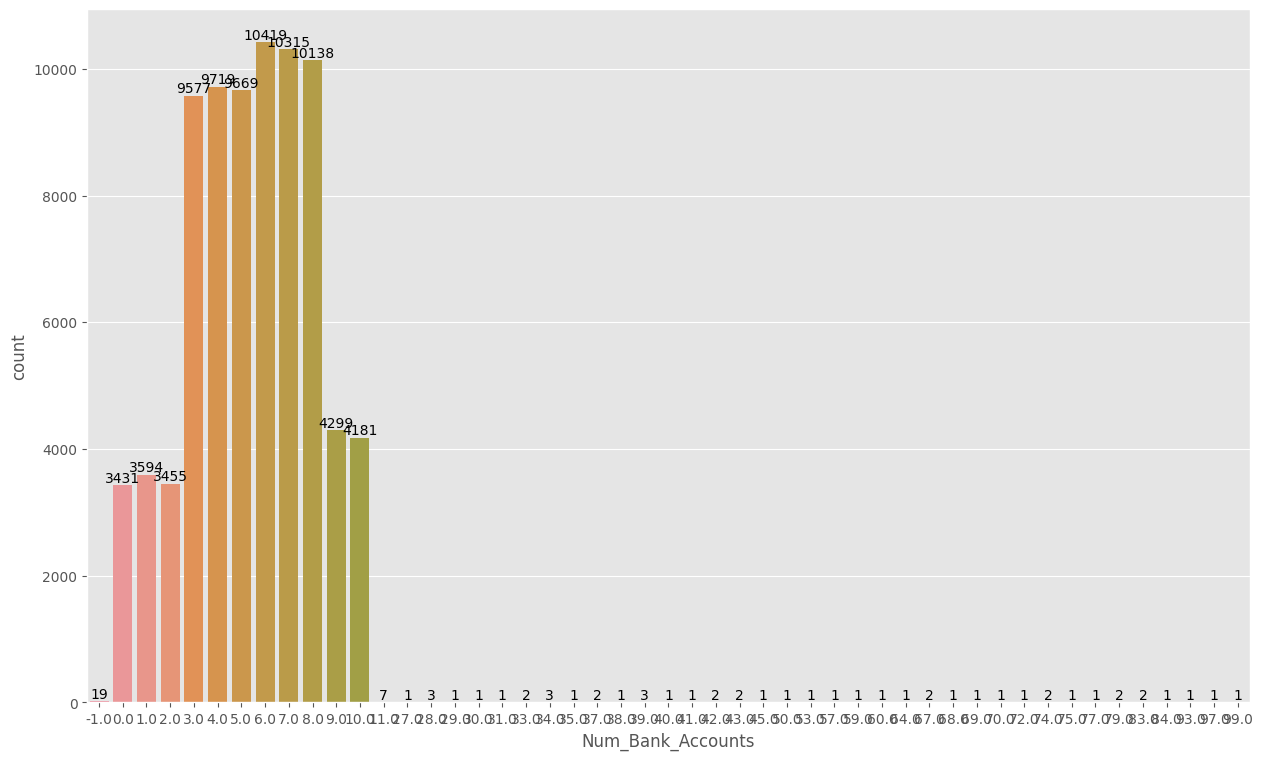

In [30]:
filtered = data[data['Num_Bank_Accounts'] < 100]
hist = countplot(filtered, x="Num_Bank_Accounts")
hist.bar_label(hist.containers[0])

[Text(0, 0, '12'),
 Text(0, 0, '1681'),
 Text(0, 0, '1710'),
 Text(0, 0, '10575'),
 Text(0, 0, '11277'),
 Text(0, 0, '14698'),
 Text(0, 0, '13221'),
 Text(0, 0, '13324'),
 Text(0, 0, '3934'),
 Text(0, 0, '3704'),
 Text(0, 0, '3852'),
 Text(0, 0, '26'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 

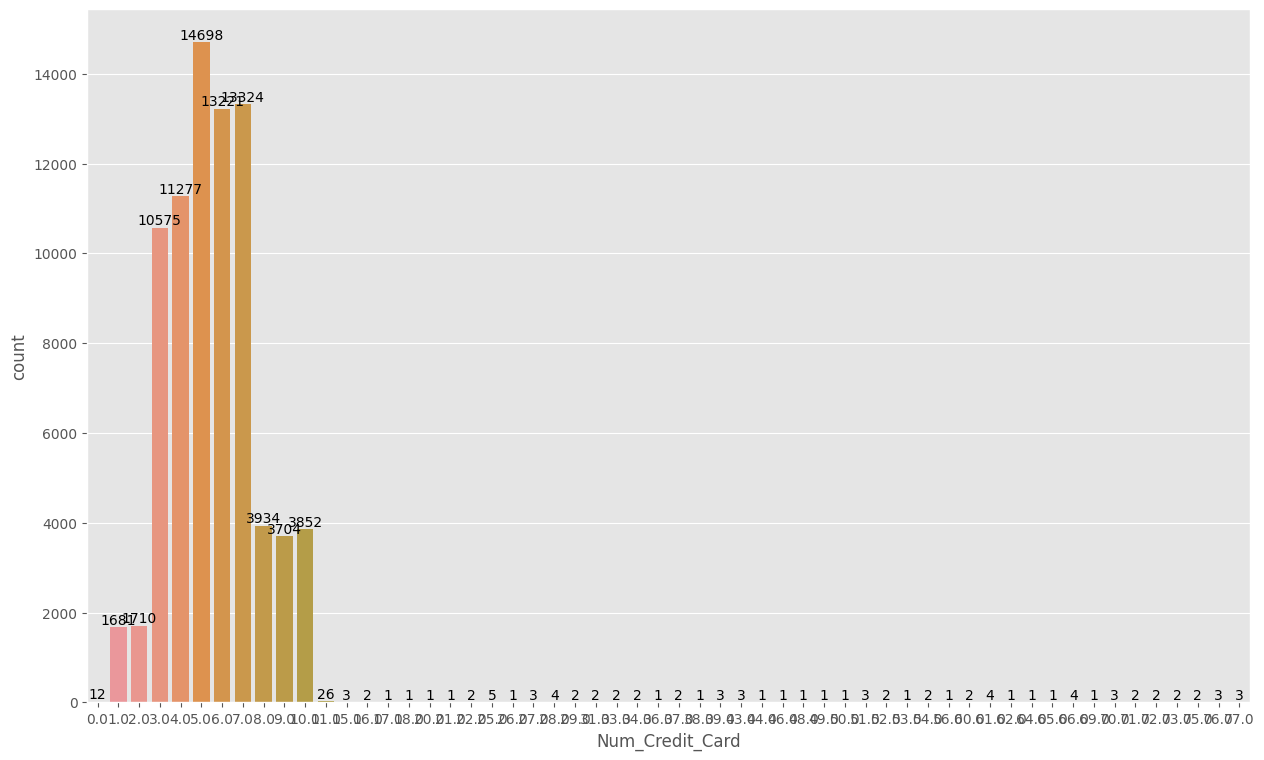

In [32]:
filtered = data[data['Num_Credit_Card'] < 80]
hist = countplot(filtered, x="Num_Credit_Card")
hist.bar_label(hist.containers[0])

In [10]:
# Se inicializa un objeto para estandarizar variables
scaler = StandardScaler()

# Codificación de las variables categóricas.
le = LabelEncoder()
data["Occupation"] = le.fit_transform(data["Occupation"])
data["Type_of_Loan"] = le.fit_transform(data["Type_of_Loan"])
data["Credit_Mix"] = le.fit_transform(data["Credit_Mix"])
data["Payment_of_Min_Amount"] = le.fit_transform(data["Payment_of_Min_Amount"])
data["Payment_Behaviour"] = le.fit_transform(data["Payment_Behaviour"])
data["Credit_Score"] = le.fit_transform(data["Credit_Score"])

data['Age'] = data['Age'].str.extract('(\d+)').astype(int)

#data['Annual_Income'] = data['Annual_Income'].str.extract('(\d+)').astype(int)
data = data.dropna(subset=['Annual_Income'])
data['Annual_Income'] = data['Annual_Income'].astype(str)
data['Annual_Income'] = data['Annual_Income'].str.extract('(\d+.\d+)').astype(float)

data = data.dropna(subset=['Num_of_Delayed_Payment'])
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(str)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.extract('(\d+.\d+)').astype(float)

data = data.dropna(subset=['Changed_Credit_Limit'])
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(str)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].str.extract('(\d+.\d+)').astype(float)

data = data.dropna(subset=['Num_of_Loan'])
data['Num_of_Loan'] = data['Num_of_Loan'].str.extract('(\d+)').astype(int)

data = data.dropna(subset=['Outstanding_Debt'])
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(str)
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.extract('(\d+.\d+)').astype(float)

data = data.dropna(subset=['Amount_invested_monthly'])
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(str)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.extract('(\d+.\d+)').astype(float)

data = data.dropna(subset=['Monthly_Balance'])
data['Monthly_Balance'] = data['Monthly_Balance'].astype(str)
data['Monthly_Balance'] = data['Monthly_Balance'].str.extract('(\d+.\d+)').astype(float)

data = data.dropna(subset=['Credit_History_Age'])
data['Credit_History_Age'] = data['Credit_History_Age'].str.extract('(\d+)').astype(int)

data.dropna()
data


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,12,19114.12,1824.843333,3,4,3,4,128,3,...,3,809.98,26.822620,22,1,49.574949,80.415295,3,312.494089,0
2,500,12,19114.12,NaN,3,4,3,4,128,3,...,1,809.98,28.609352,22,1,49.574949,81.699521,5,331.209863,0
3,23,12,19114.12,NaN,3,4,3,4,128,5,...,1,809.98,31.377862,22,1,49.574949,199.458074,6,223.451310,0
5,23,12,19114.12,NaN,3,4,3,4,128,8,...,1,809.98,27.262259,22,1,49.574949,62.430172,0,340.479212,0
6,23,12,19114.12,1824.843333,3,4,3,4,128,3,...,1,809.98,22.537593,22,1,49.574949,178.344067,6,244.565317,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,9,39628.99,3359.415833,4,6,7,2,683,20,...,3,502.38,39.323569,31,1,35.104023,140.581403,2,410.256158,1
99995,25,9,39628.99,3359.415833,4,6,7,2,683,23,...,3,502.38,34.663572,31,1,35.104023,60.971333,1,479.866228,1
99996,25,9,39628.99,3359.415833,4,6,7,2,683,18,...,3,502.38,40.565631,31,1,35.104023,54.185950,2,496.651610,1
99997,25,9,39628.99,3359.415833,4,6,5729,2,683,27,...,1,502.38,41.255522,31,1,35.104023,24.028477,1,516.809083,1


In [11]:
imputer = SimpleImputer(strategy='mean')

data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128.0,3.0,...,3.0,809.98,26.822620,22.0,1.0,49.574949,80.415295,3.0,312.494089,0.0
1,500.0,12.0,19114.12,4160.047651,3.0,4.0,3.0,4.0,128.0,3.0,...,1.0,809.98,28.609352,22.0,1.0,49.574949,81.699521,5.0,331.209863,0.0
2,23.0,12.0,19114.12,4160.047651,3.0,4.0,3.0,4.0,128.0,5.0,...,1.0,809.98,31.377862,22.0,1.0,49.574949,199.458074,6.0,223.451310,0.0
3,23.0,12.0,19114.12,4160.047651,3.0,4.0,3.0,4.0,128.0,8.0,...,1.0,809.98,27.262259,22.0,1.0,49.574949,62.430172,0.0,340.479212,0.0
4,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128.0,3.0,...,1.0,809.98,22.537593,22.0,1.0,49.574949,178.344067,6.0,244.565317,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79867,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,20.0,...,3.0,502.38,39.323569,31.0,1.0,35.104023,140.581403,2.0,410.256158,1.0
79868,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,23.0,...,3.0,502.38,34.663572,31.0,1.0,35.104023,60.971333,1.0,479.866228,1.0
79869,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,18.0,...,3.0,502.38,40.565631,31.0,1.0,35.104023,54.185950,2.0,496.651610,1.0
79870,25.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,683.0,27.0,...,1.0,502.38,41.255522,31.0,1.0,35.104023,24.028477,1.0,516.809083,1.0


<AxesSubplot: >

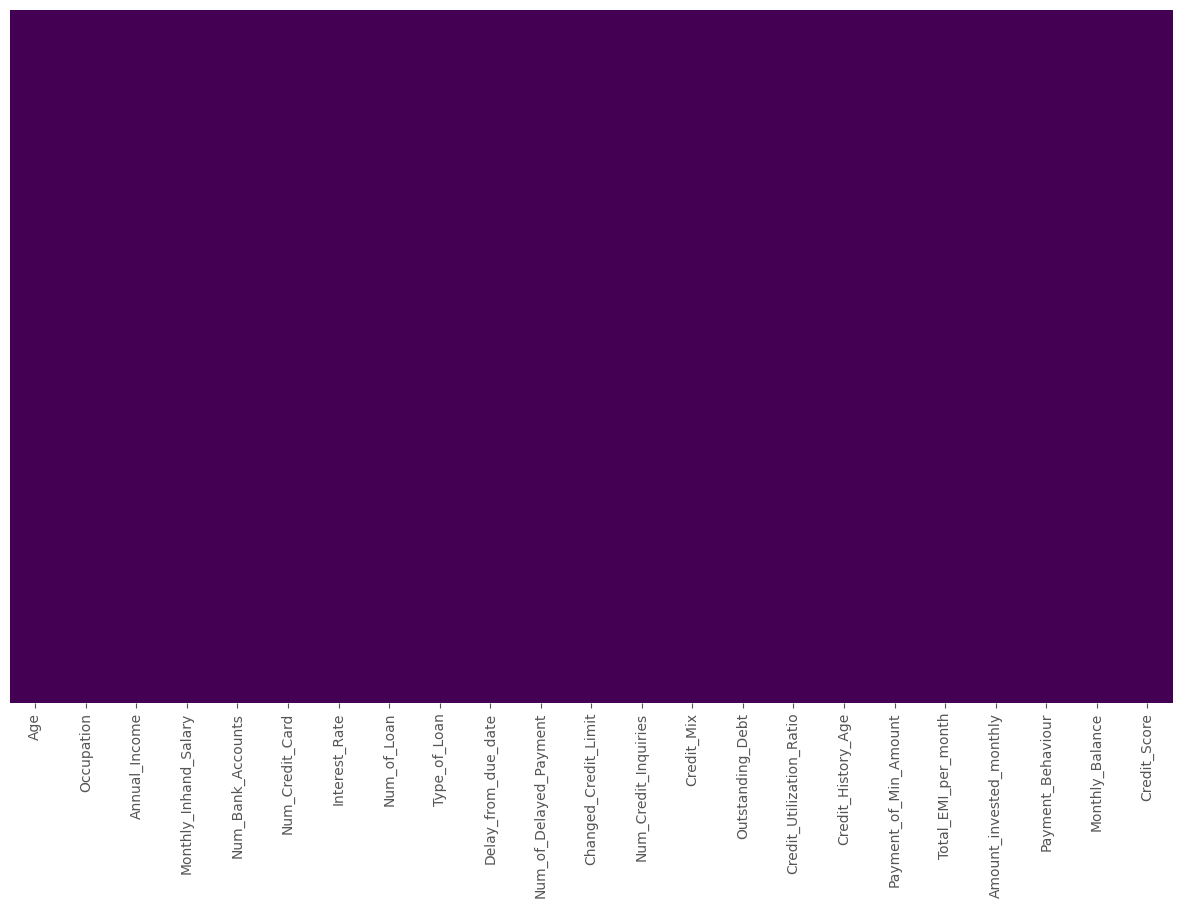

In [12]:
heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
X = data.drop('Credit_Score', axis=1)
y = data["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128.0,3.0,...,3.0,809.98,26.822620,22.0,1.0,49.574949,80.415295,3.0,312.494089,0.0
1,500.0,12.0,19114.12,4160.047651,3.0,4.0,3.0,4.0,128.0,3.0,...,1.0,809.98,28.609352,22.0,1.0,49.574949,81.699521,5.0,331.209863,0.0
2,23.0,12.0,19114.12,4160.047651,3.0,4.0,3.0,4.0,128.0,5.0,...,1.0,809.98,31.377862,22.0,1.0,49.574949,199.458074,6.0,223.451310,0.0
3,23.0,12.0,19114.12,4160.047651,3.0,4.0,3.0,4.0,128.0,8.0,...,1.0,809.98,27.262259,22.0,1.0,49.574949,62.430172,0.0,340.479212,0.0
4,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128.0,3.0,...,1.0,809.98,22.537593,22.0,1.0,49.574949,178.344067,6.0,244.565317,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79867,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,20.0,...,3.0,502.38,39.323569,31.0,1.0,35.104023,140.581403,2.0,410.256158,1.0
79868,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,23.0,...,3.0,502.38,34.663572,31.0,1.0,35.104023,60.971333,1.0,479.866228,1.0
79869,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,683.0,18.0,...,3.0,502.38,40.565631,31.0,1.0,35.104023,54.185950,2.0,496.651610,1.0
79870,25.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,683.0,27.0,...,1.0,502.38,41.255522,31.0,1.0,35.104023,24.028477,1.0,516.809083,1.0


In [14]:
k = 15
select_k_best = SelectKBest(mutual_info_classif, k=k)
X_train_new = select_k_best.fit_transform(X_train_scaled, y_train_balanced)
X_test_new = select_k_best.transform(X_test_scaled)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_new, y_train_balanced)

y_pred = model.predict(X_test_new)
y_pred

array([0., 0., 0., ..., 2., 1., 0.])

<AxesSubplot: >

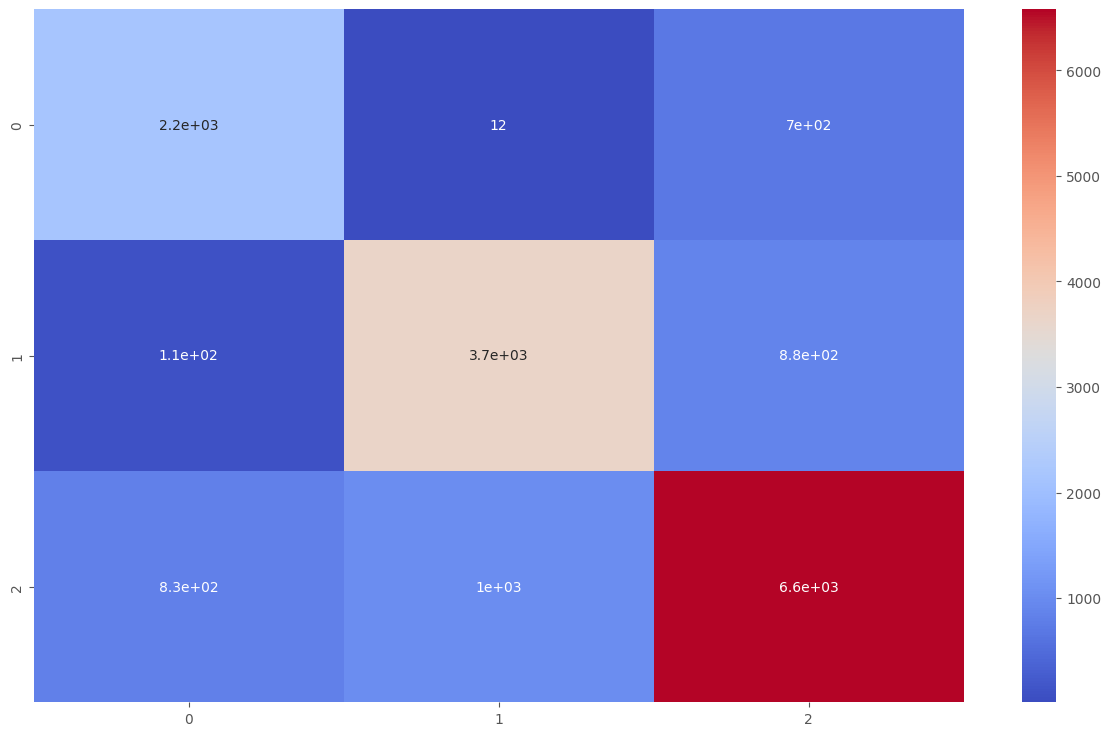

In [15]:
matrix = metrics.confusion_matrix(y_test, y_pred)
heatmap(matrix, annot=True, cmap='coolwarm')

In [16]:
print("Accuracy:", (metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.7773395931142411


In [17]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72      2871
         1.0       0.78      0.79      0.78      4661
         2.0       0.81      0.78      0.79      8443

    accuracy                           0.78     15975
   macro avg       0.76      0.77      0.77     15975
weighted avg       0.78      0.78      0.78     15975

